In [5]:
import os

import numpy as np
import torch
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms

#from utils.data_loading import BasicDataset
from utils.data_load import KittiDataset
#from unet import UNet
from model.ensemblenet_model import EnsembleNet
#from utils.utils import plot_img_and_mask


In [9]:
Image_Size = [384, 1242]


def predict_img(net,
                full_img,
                device,
                scale_factor=1,
                out_threshold=0.5):
    net.eval()
    #img = torch.from_numpy(KittiDataset.preprocess(None, full_img, scale_factor, is_mask=False))
    img = torch.from_numpy(KittiDataset.preprocess(None, full_img, [384, 1242], scale_factor, is_mask=False))
    #KittiDataset(dirImg, dirMask, Image_Size, Scale_Percent)
    img = img.unsqueeze(0)
    img = img.to(device=device, dtype=torch.float32)

    with torch.no_grad():
        output = net(img).cpu()
        output = F.interpolate(output, (full_img.size[1], full_img.size[0]), mode='bilinear')
        if net.n_classes > 1:
            mask = output.argmax(dim=1)
        else:
            mask = torch.sigmoid(output) > out_threshold

    return mask[0].long().squeeze().numpy()



def mask_to_image(mask: np.ndarray, mask_values):
    if isinstance(mask_values[0], list):
        out = np.zeros((mask.shape[-2], mask.shape[-1], len(mask_values[0])), dtype=np.uint8)
    elif mask_values == [0, 1]:
        out = np.zeros((mask.shape[-2], mask.shape[-1]), dtype=bool)
    else:
        out = np.zeros((mask.shape[-2], mask.shape[-1]), dtype=np.uint8)

    if mask.ndim == 3:
        mask = np.argmax(mask, axis=0)

    for i, v in enumerate(mask_values):
        out[mask == i] = v

    return Image.fromarray(out)


if __name__ == '__main__':


    #net = UNet(n_channels=3, n_classes=args.classes, bilinear=args.bilinear)
    net = EnsembleNet('ensemble_voting', 3, 31)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


    net.to(device=device)
    state_dict = torch.load('../trained/checkpoint_epoch10.pth', map_location=device)
    mask_values = state_dict.pop('mask_values', [0, 1])
    net.load_state_dict(state_dict)


    
    img = Image.open('data/training/image_2/000000_10.png')

    mask = predict_img(net=net,
                       full_img=img,
                       scale_factor=1.0,
                       out_threshold=0.5,
                       device=device)

        



/home/user1/anaconda3/envs/ksh/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/home/user1/anaconda3/envs/ksh/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/home/user1/anaconda3/envs/ksh/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This typ

In [13]:
true_mask = Image.open('data/training/semantic/000000_10.png')

In [16]:
np.unique(np.array(true_mask))

array([ 4,  7,  8, 11, 12, 13, 17, 20, 21, 23, 24, 26, 27, 28],
      dtype=uint8)

In [18]:
np.array(true_mask).shape

(375, 1242)

In [28]:
mask.shape

(375, 1242)

array([18, 18, 18, ..., 18, 18, 18])

In [54]:
dd = mask_to_image(mask, mask_values)

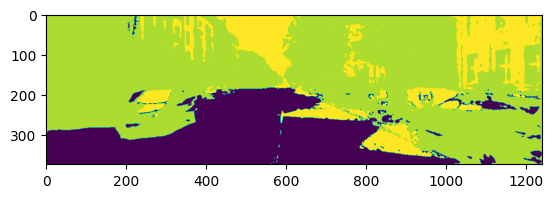

In [ ]:
out_filename = out_files[i]
result = mask_to_image(mask, mask_values)

In [34]:
np.array(img).shape

(375, 1242)

In [41]:
qq = KittiDataset.preprocess(None, img, Image_Size, 1, is_mask = False)

In [42]:
qq = np.transpose(qq, (1,2,0))

In [48]:
qq2 = qq.reshape(qq.shape[0], qq.shape[1])

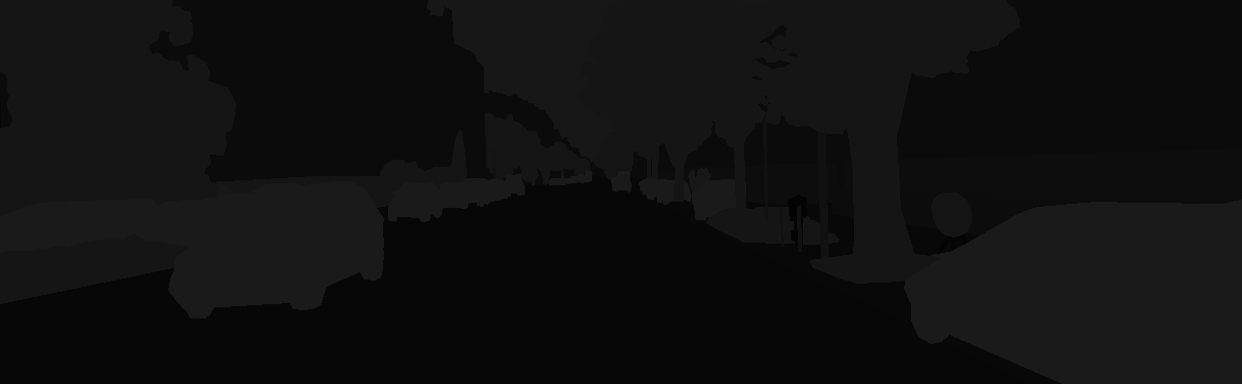

In [53]:
Image.fromarray(qq2)

In [49]:
import matplotlib.pyplot as plt

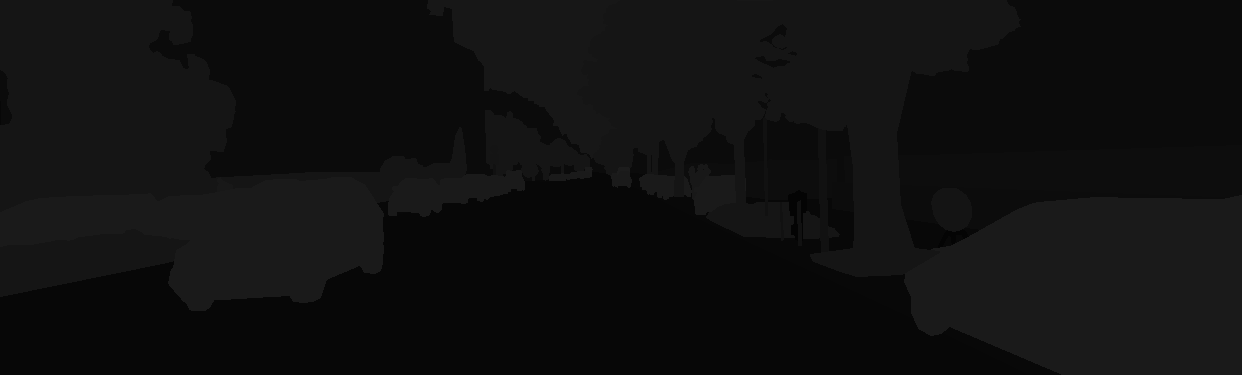

In [52]:
img

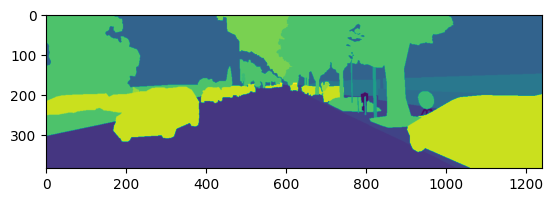

In [50]:
plt.imshow(qq2)

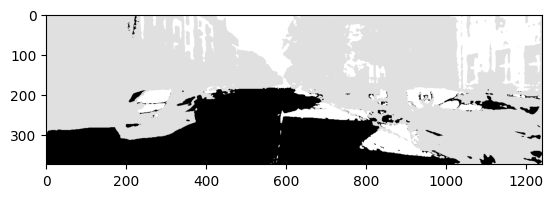

In [60]:
plt.imshow(mask, 'gray')